                   Image_Path     Binary_Label Multiclass_Label  \
0     0/IMG20250424000823.jpg  Not Adulterated               No   
1  0/IMG20250423222733_01.jpg  Not Adulterated               No   
2     0/IMG20250423221953.jpg  Not Adulterated               No   
3     0/IMG20250423235946.jpg  Not Adulterated               No   
4     0/IMG20250424000948.jpg  Not Adulterated               No   

  Thirteen_Class_Label  
0      No_Adulteration  
1      No_Adulteration  
2      No_Adulteration  
3      No_Adulteration  
4      No_Adulteration  


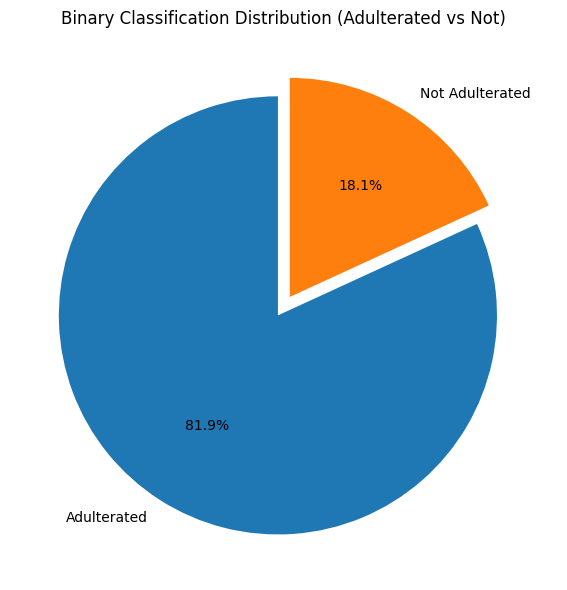

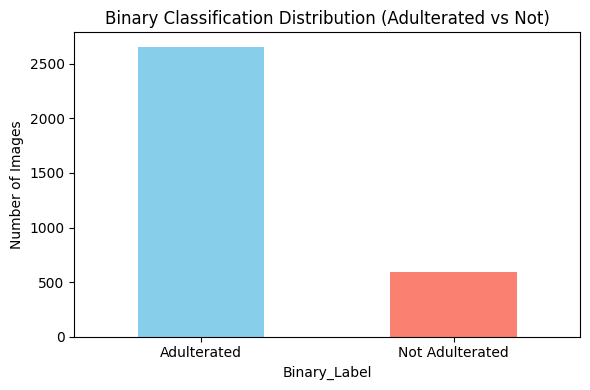

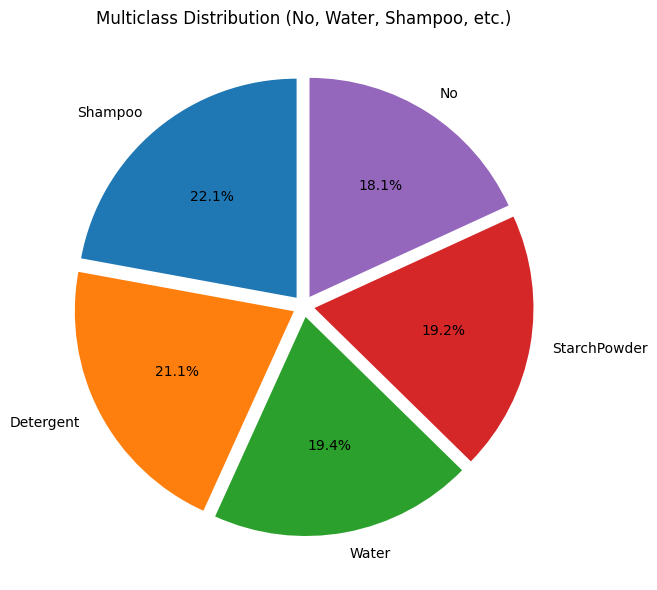

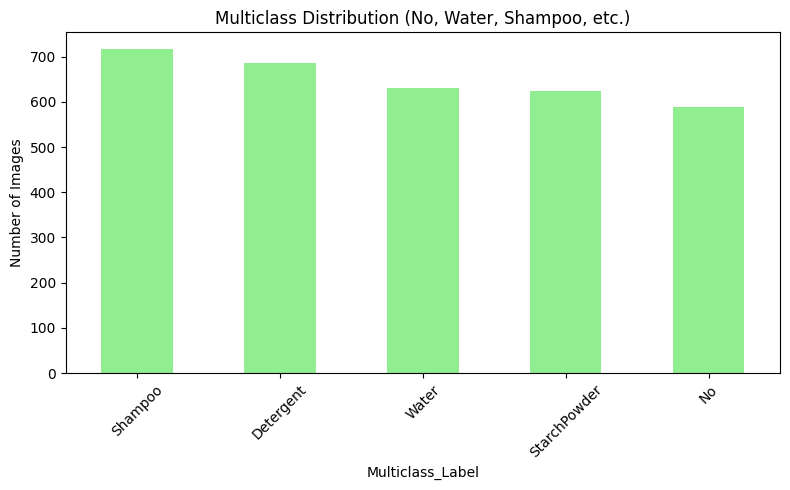

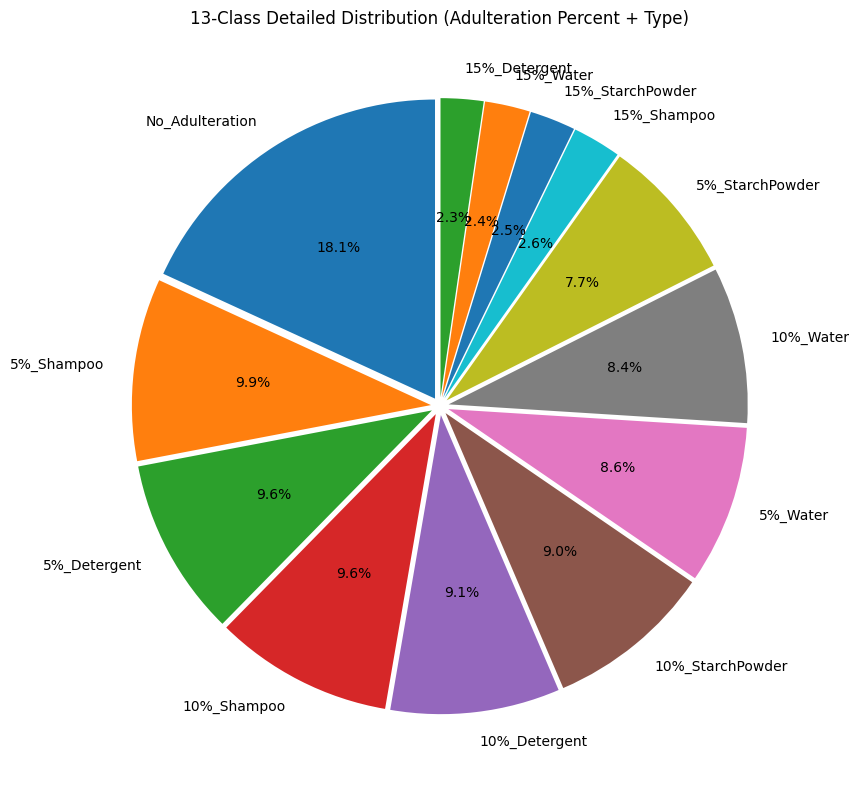

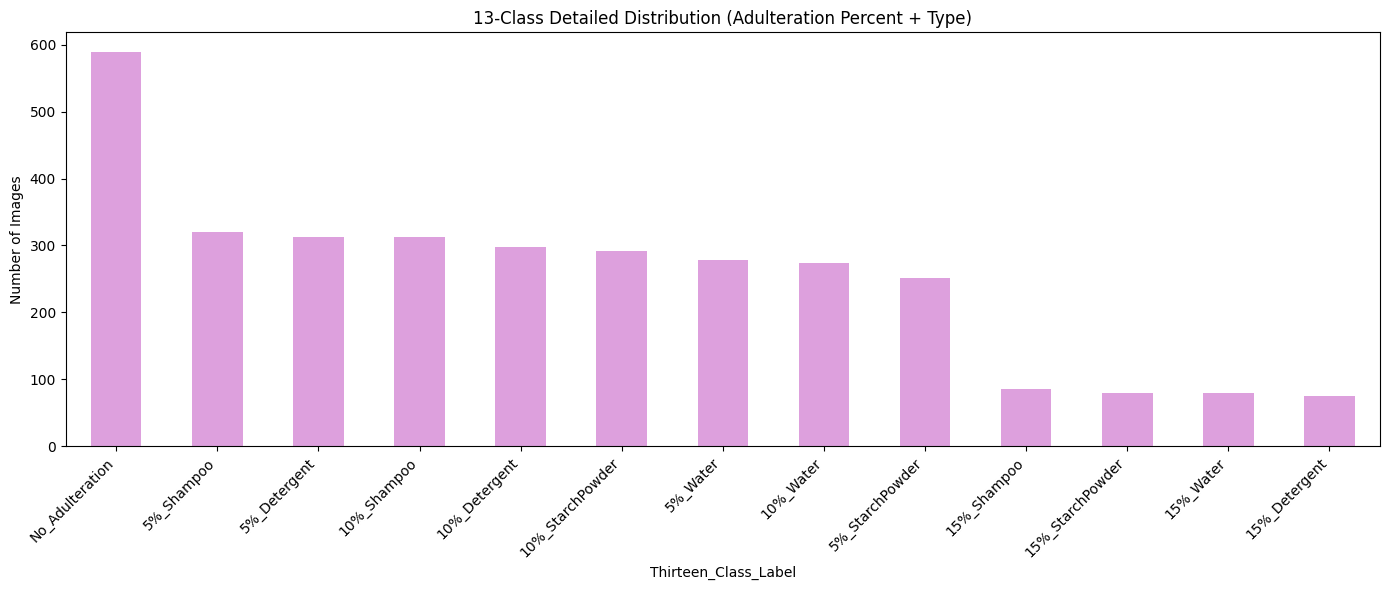

Total images: 3246


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the root directory
root_dir = "CompleteFolder/dataset"  # your new dataset folder

# Lists to store data
binary_labels = []
multiclass_labels = []
thirteen_class_labels = []
image_paths = []

# Loop through adulteration levels
for adul_percent_dir in os.listdir(root_dir):
    adul_percent_path = os.path.join(root_dir, adul_percent_dir)
    
    if not os.path.isdir(adul_percent_path):
        continue

    if adul_percent_dir == "0":
        # No adulteration
        for img in os.listdir(adul_percent_path):
            if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
                image_paths.append(os.path.join(adul_percent_dir, img))
                binary_labels.append("Not Adulterated")
                multiclass_labels.append("No")
                thirteen_class_labels.append("No_Adulteration")
    else:
        # Adulterated (5, 10, 15)
        for adulterant in os.listdir(adul_percent_path):
            adulterant_path = os.path.join(adul_percent_path, adulterant)
            if not os.path.isdir(adulterant_path):
                continue
            for img in os.listdir(adulterant_path):
                if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
                    image_paths.append(os.path.join(adul_percent_dir, adulterant, img))
                    binary_labels.append("Adulterated")
                    multiclass_labels.append(adulterant)
                    thirteen_class_labels.append(f"{adul_percent_dir}%_{adulterant}")

# Create DataFrame
df = pd.DataFrame({
    "Image_Path": image_paths,
    "Binary_Label": binary_labels,
    "Multiclass_Label": multiclass_labels,
    "Thirteen_Class_Label": thirteen_class_labels
})

# Save dataframe
df.to_csv("milk_adulteration_labels.csv", index=False)

print(df.head())

# --- Plot 1: Binary Classification ---
binary_counts = df['Binary_Label'].value_counts()

plt.figure(figsize=(6,6))
binary_counts.plot.pie(autopct='%1.1f%%', startangle=90, explode=(0.05,0.05))
plt.title("Binary Classification Distribution (Adulterated vs Not)")
plt.ylabel("")
plt.tight_layout()
plt.savefig("binary_classification_pie.png")
plt.show()

# Bar Chart
plt.figure(figsize=(6,4))
binary_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Binary Classification Distribution (Adulterated vs Not)")
plt.ylabel("Number of Images")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("binary_classification_bar.png")
plt.show()

# --- Plot 2: Multiclass Classification ---
multiclass_counts = df['Multiclass_Label'].value_counts()

plt.figure(figsize=(8,6))
multiclass_counts.plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.05]*len(multiclass_counts))
plt.title("Multiclass Distribution (No, Water, Shampoo, etc.)")
plt.ylabel("")
plt.tight_layout()
plt.savefig("multiclass_classification_pie.png")
plt.show()

# Bar Chart
plt.figure(figsize=(8,5))
multiclass_counts.plot(kind='bar', color='lightgreen')
plt.title("Multiclass Distribution (No, Water, Shampoo, etc.)")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("multiclass_classification_bar.png")
plt.show()

# --- Plot 3: 13-Class Detailed Classification ---
thirteen_class_counts = df['Thirteen_Class_Label'].value_counts()

plt.figure(figsize=(12,8))
thirteen_class_counts.plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.03]*len(thirteen_class_counts))
plt.title("13-Class Detailed Distribution (Adulteration Percent + Type)")
plt.ylabel("")
plt.tight_layout()
plt.savefig("thirteen_class_pie.png")
plt.show()

# Bar Chart
plt.figure(figsize=(14,6))
thirteen_class_counts.plot(kind='bar', color='plum')
plt.title("13-Class Detailed Distribution (Adulteration Percent + Type)")
plt.ylabel("Number of Images")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("thirteen_class_bar.png")
plt.show()

# Print totals
print(f"Total images: {len(df)}")
